In [2]:
import pandas as pd
from db_utils import Query, QueryAll

data = QueryAll("listings")
cols = ["id", "title", "globalId", "categoryId", "categoryName", "url", "location", "shippingType", "shippingLocations",
                "shippingTime", "startTime", "endTime", "returnsAccepted", "conditionId", "listingIsTopRated", 
                "sellerFeedbackScore", "sellerPositivePercent", "sellerName", "sellerIsTopRated", "price", "currency", "bids"]

In [3]:
df = pd.DataFrame(data, columns=cols)

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split

x, y = df.sellerFeedbackScore.values.reshape(-1,1), df.price.values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
knn_r_acc = []
for i in range(1,50,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    test_score = knn.score(x_test, y_test)
    train_score = knn.score(x_train, y_train)
    knn_r_acc.append((i, test_score, train_score))
scores = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])

In [11]:
model = KNeighborsRegressor(n_neighbors = 50)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=50)

In [12]:
from sklearn.metrics import mean_squared_error 

pred_y = model.predict(x_test)
mse = mean_squared_error(y_test, pred_y)

In [13]:
mse

284190.65200267686

Text(0, 0.5, 'predicted')

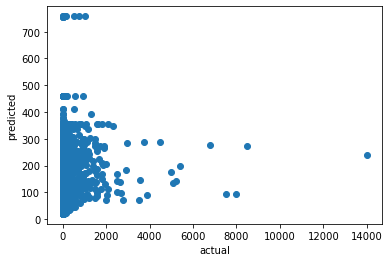

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test,pred_y)
plt.xlabel('actual')
plt.ylabel('predicted')